In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#PART A
Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

Loading the dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/horse.csv')

In [ ]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [ ]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [ ]:
df.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,absent,normal,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [ ]:
df.info() #check nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

Data preprocessing (Dealing with missing values)

Drop irrelevant column and columns with significant null values

In [ ]:
df = df.drop(['cp_data', 'lesion_3', 'nasogastric_reflux_ph','nasogastric_reflux', 'abdomen','abdomo_protein', 'abdomo_appearance','rectal_exam_feces', 'nasogastric_tube'], axis=1)

Visualization of missing values using heatmap and bargraph

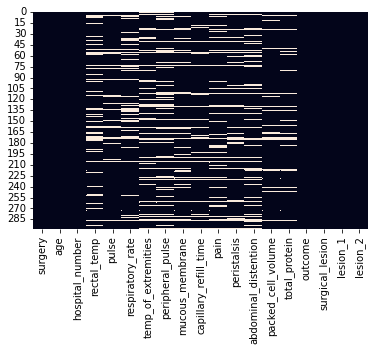

In [ ]:
#Heatmap for missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False) 

surgery                   0
age                       0
hospital_number           0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          47
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
outcome                   0
surgical_lesion           0
lesion_1                  0
lesion_2                  0
dtype: int64


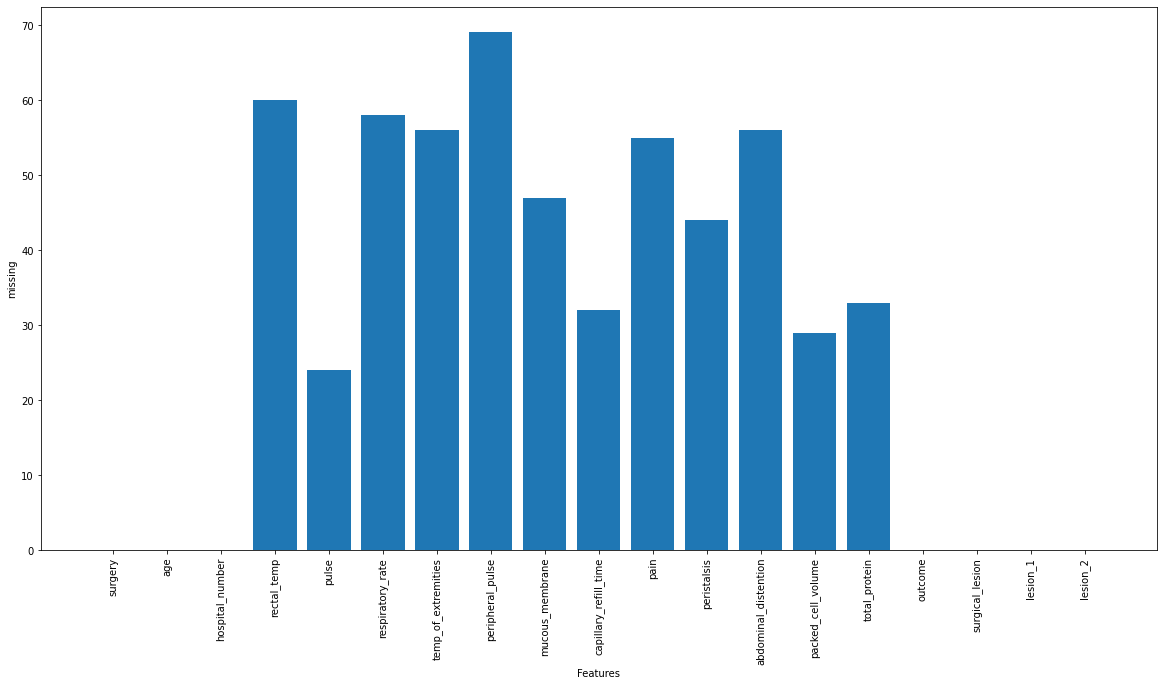

In [ ]:
#BarGraph of missing values for clearer visualisation
null = df.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(df.columns))), list(df.columns.values), rotation='vertical')
plt.show

print(null)

In [ ]:
df = df.fillna(0)

Finding relations between features and taget variable(outcome) by visualising data
Relation between outcome and degree of pain experienced by the horse

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


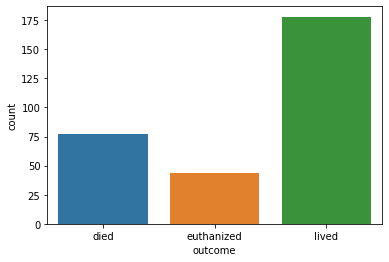

In [ ]:
import seaborn as sns
sns.countplot(data=df, x="outcome");
print(df.outcome.value_counts())

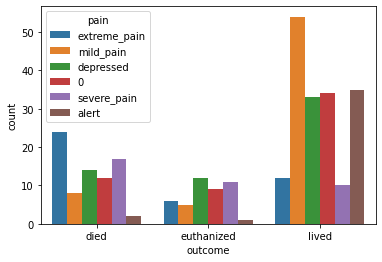

In [ ]:

sns.countplot(data=df, x='outcome', hue = 'pain')

Finding relations between features and taget variable(outcome) by visualising data
Relation between outcome and surgery of the horse

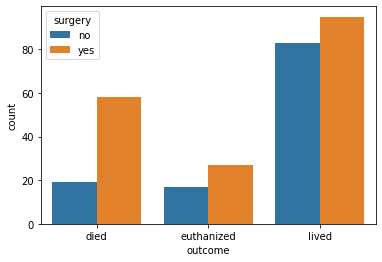

In [ ]:
sns.countplot(data=df, x='outcome', hue = 'surgery')

In [ ]:
df = df.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
df = df.dropna(how = 'any', axis = 'rows')

Handling categorical variables by find and replace method

In [ ]:
cleanup_nums = {"surgery":{"yes": 1, "no": 0},
                "age":{"adult": 1, "young": 0},
                "temp_of_extremities": {"normal": 1, "warm": 2, "cool": 3, "cold": 4},
                "peripheral_pulse": {"normal": 1, "increased": 2, "reduced": 3, "absent": 4},
                "mucous_membrane": {"normal_pink": 1, "bright_pink": 2, "pale_pink": 3,  "pale_cyanotic": 4, "bright_red / injected": 5, "dark_cyanotic": 6 },
                "capillary_refill_time":{"less_3_sec":1,"more_3_sec":2},
                "pain":{"depressed": 2,"extreme_pain":5 ,"mild_pain": 3,"severe_pain": 4,"alert":1},
                "peristalsis":{"hypermotile": 1, "normal": 2, "hypomotile": 3, "absent": 4 },
                "abdominal_distention":{"none": 1, "slight": 2, "moderate": 3, "severe": 4 },
                "surgical_lesion":{"yes": 1,"no": 0}
                }
                                  

In [ ]:
df = df.replace(cleanup_nums)
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2
0,0,1,530101,38.5,66.0,28.0,3,3,0,2,5,4,4,45.0,8.4,0.0,0,11300,0
2,0,1,530334,38.3,40.0,24.0,1,1,3,1,3,3,1,33.0,6.7,1.0,0,0,0
3,1,0,5290409,39.1,164.0,84.0,4,1,6,2,2,4,4,48.0,7.2,0.0,1,2208,0
4,0,1,530255,37.3,104.0,35.0,0,0,6,2,0,0,0,74.0,7.4,0.0,0,4300,0
5,0,1,528355,0.0,0.0,0.0,2,1,3,1,2,3,2,0.0,0.0,1.0,0,0,0


Finding the correlation of features and their influence on target variable

In [ ]:
df.corr()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2
surgery,1.000000,-0.089420,0.171399,-0.082350,0.140571,0.109367,0.045144,0.155558,0.191232,0.195563,0.193433,-0.005808,-0.098573,-0.205741,0.720124,0.177630,0.117832
age,-0.089420,1.000000,-0.735908,-0.024449,-0.461132,-0.363781,0.125057,0.083728,0.029925,0.092598,0.017197,0.053416,0.111203,0.120909,-0.041952,-0.026136,-0.015620
hospital_number,0.171399,-0.735908,1.000000,0.048689,0.280383,0.259571,-0.120995,-0.100161,-0.059386,-0.185753,-0.033978,-0.091718,-0.208907,-0.127637,0.100393,0.150596,-0.055298
rectal_temp,-0.082350,-0.024449,0.048689,1.000000,0.174775,0.269293,-0.089132,-0.106392,-0.149080,-0.032463,-0.104648,0.049355,0.079425,0.191620,-0.151285,-0.047845,0.024172
pulse,0.140571,-0.461132,0.280383,0.174775,1.000000,0.463877,0.195427,0.264714,0.162519,0.304095,0.265106,0.265110,-0.080051,-0.210945,0.224783,0.050286,0.019443
respiratory_rate,0.109367,-0.363781,0.259571,0.269293,0.463877,1.000000,0.070177,0.121194,-0.012173,0.065087,0.071171,0.026384,-0.101813,-0.016160,0.120767,0.103455,0.031748
temp_of_extremities,0.045144,0.125057,-0.120995,-0.089132,0.195427,0.070177,1.000000,0.577228,0.366497,0.500426,0.536889,0.353578,-0.033901,-0.221942,0.129638,0.014889,-0.006600
peripheral_pulse,0.155558,0.083728,-0.100161,-0.106392,0.264714,0.121194,0.577228,1.000000,0.369175,0.501260,0.500170,0.393345,-0.060044,-0.262129,0.252791,0.091542,-0.077372
pain,0.191232,0.029925,-0.059386,-0.149080,0.162519,-0.012173,0.366497,0.369175,1.000000,0.473555,0.563768,0.229165,-0.027828,-0.310342,0.293873,0.111527,0.048589
peristalsis,0.195563,0.092598,-0.185753,-0.032463,0.304095,0.065087,0.500426,0.501260,0.473555,1.000000,0.559032,0.333463,0.016908,-0.124946,0.261126,0.132067,0.059140


Find the correlation among the columns

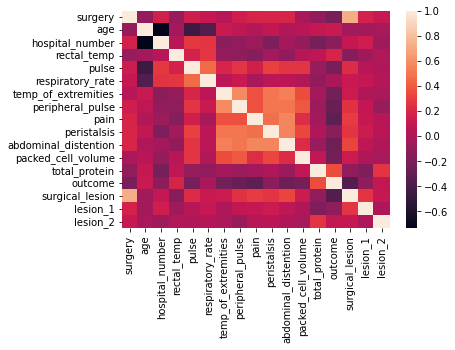

In [ ]:
#Heatmap of correlations
corr= df.corr()
sns.heatmap(corr)

This shows that features like pulse, surgical lesion, pain are having strong relations with our target variable which implies that these features play the most crucial role in classifying the target variable compared to other features.

In [ ]:
df = df.drop(['rectal_temp', 'respiratory_rate', 'total_protein','mucous_membrane'], axis=1)

In [ ]:
#Cleaned and processed train dataset
display(df.head())
display(df.shape)

,surgery,age,hospital_number,pulse,temp_of_extremities,peripheral_pulse,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,outcome,surgical_lesion,lesion_1,lesion_2
0,0,1,530101,66.0,3,3,2,5,4,4,45.0,0.0,0,11300,0
2,0,1,530334,40.0,1,1,1,3,3,1,33.0,1.0,0,0,0
3,1,0,5290409,164.0,4,1,2,2,4,4,48.0,0.0,1,2208,0
4,0,1,530255,104.0,0,0,2,0,0,0,74.0,0.0,0,4300,0
5,0,1,528355,0.0,2,1,1,2,3,2,0.0,1.0,0,0,0


(255, 15)

Splitting of dataset in training= 80 % and testing size as 20% 

In [ ]:
from sklearn.model_selection import train_test_split
Selected_features = [ 'surgery', 'age','pulse', 'peripheral_pulse', 'pain', 'peristalsis', 'abdominal_distention', 'packed_cell_volume','surgical_lesion', 'lesion_1','lesion_2']
X = df[Selected_features]
y = df['outcome']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=0)  

Building logistic regression model and importing evaluation parameter

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report  
clf = LogisticRegression(random_state=4, max_iter=10000)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)

log_regr_score:  0.7254901960784313


Evaluation parameters 

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', cm1)
print(classification_report(y_test,y_pred))


Confusion Matrix :  [[ 3  9]
 [ 5 34]]
              precision    recall  f1-score   support

         0.0       0.38      0.25      0.30        12
         1.0       0.79      0.87      0.83        39

    accuracy                           0.73        51
   macro avg       0.58      0.56      0.56        51
weighted avg       0.69      0.73      0.70        51



finetune the model

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res,= sm.fit_resample(X_train, y_train.ravel())
clf = LogisticRegression(max_iter=1000)
model_res = clf.fit(X_train_res, y_train_res)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 72.549 %


#PART B
Predict a car's fuel economy from its physical parameters such as weight and engine size and power

Loading dataset

In [ ]:
df_autos = pd.read_csv('/content/drive/MyDrive/Data_Science/auto-mpg.csv')

In [ ]:
df_autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df_autos.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df_autos.shape

(398, 9)

Visualizing the correlation to find the impact of parameters on target variable named mpg i.e. fuel economy

In [ ]:
corr = df_autos.corr()

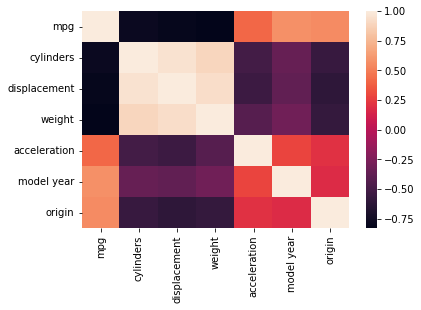

In [ ]:
sns.heatmap(corr)

Data pre-processing and handling NA values, dropping irrelevant columns

In [ ]:
print(df_autos.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
# Dropping  car name column
df_autos.drop(['car name'], inplace = True, axis = 1)
df_autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
df_autos = df_autos.replace('?', 0)

In [ ]:
df_autos = df_autos.apply(pd.to_numeric)

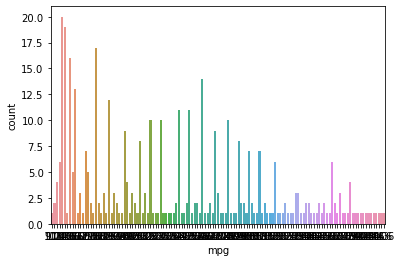

In [ ]:
sns.countplot(data=df_autos, x="mpg");

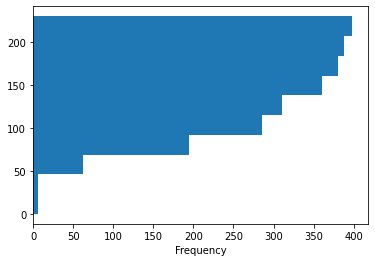

In [ ]:
plt.figure();
df_autos["horsepower"].plot.hist(orientation="horizontal", cumulative=True);

<Figure size 432x288 with 0 Axes>

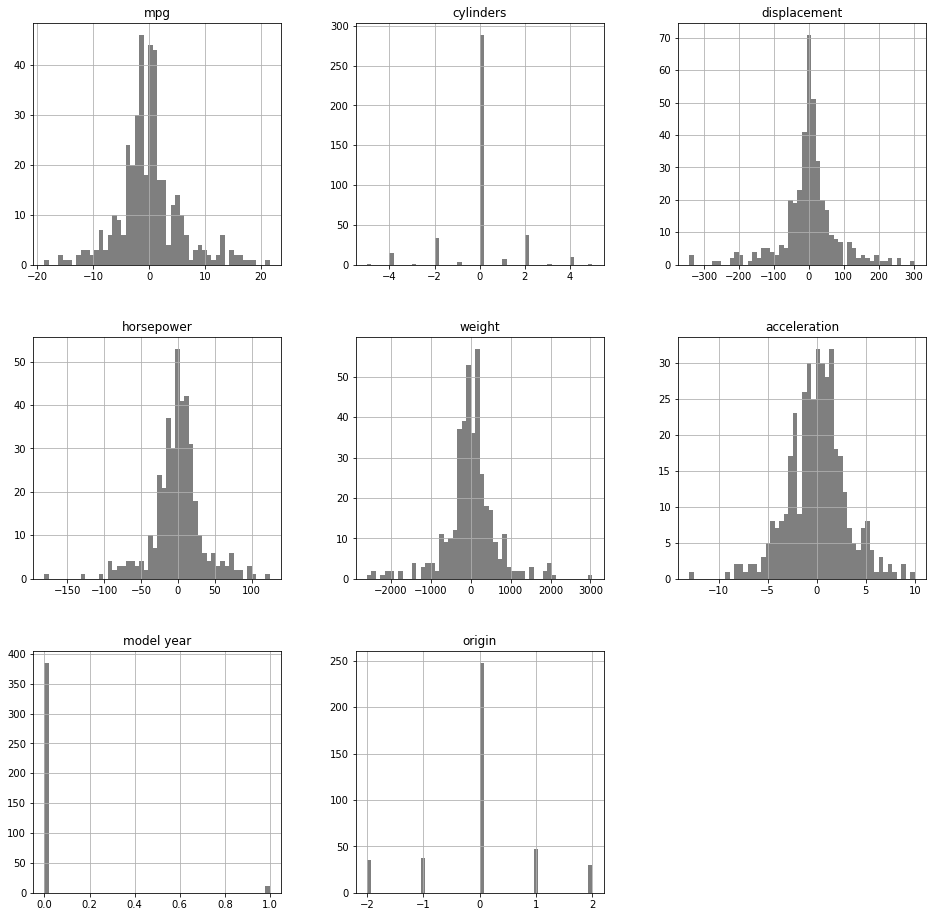

In [ ]:
plt.figure();
df_autos.diff().hist(color="k", alpha=0.5, bins=50, figsize=(16, 16));

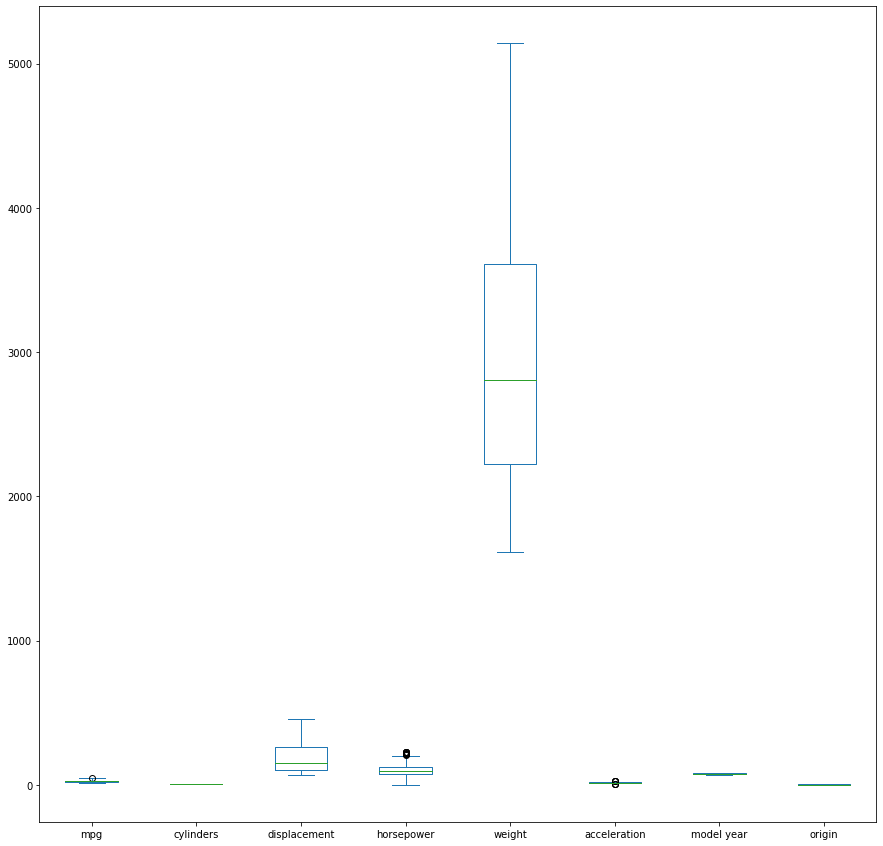

In [ ]:
df_autos.plot.box(figsize=(15, 15));

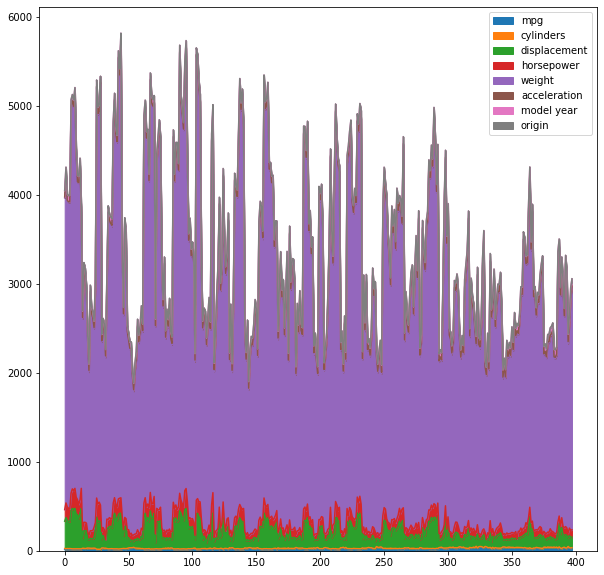

In [ ]:
df_autos.plot.area(figsize=(10, 10));

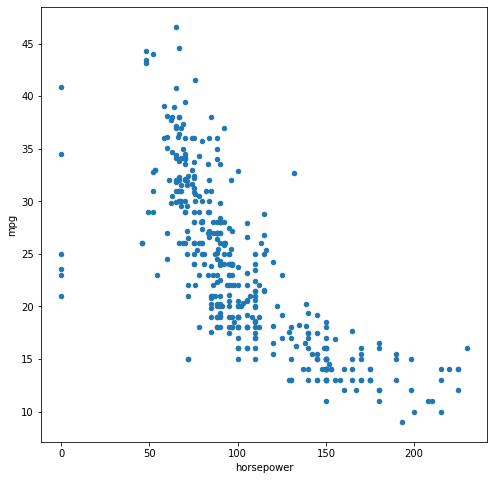

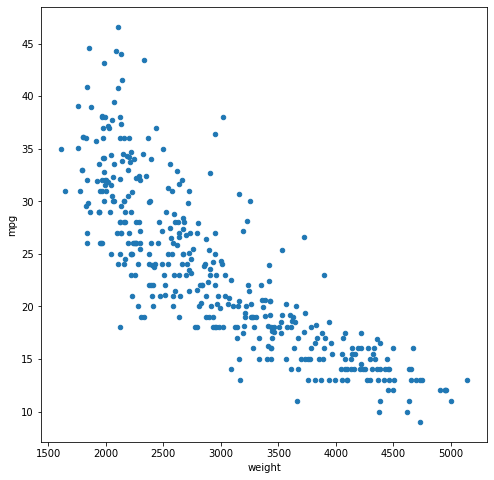

In [ ]:
df_autos.plot.scatter(x="horsepower", y="mpg", figsize=(8, 8));
df_autos.plot.scatter(x="weight", y="mpg", figsize=(8, 8));

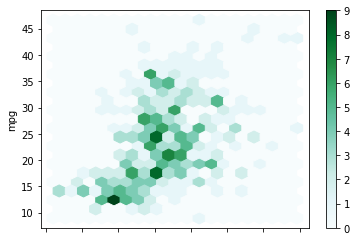

In [ ]:
df_autos.plot.hexbin(x="acceleration", y="mpg", gridsize=20);

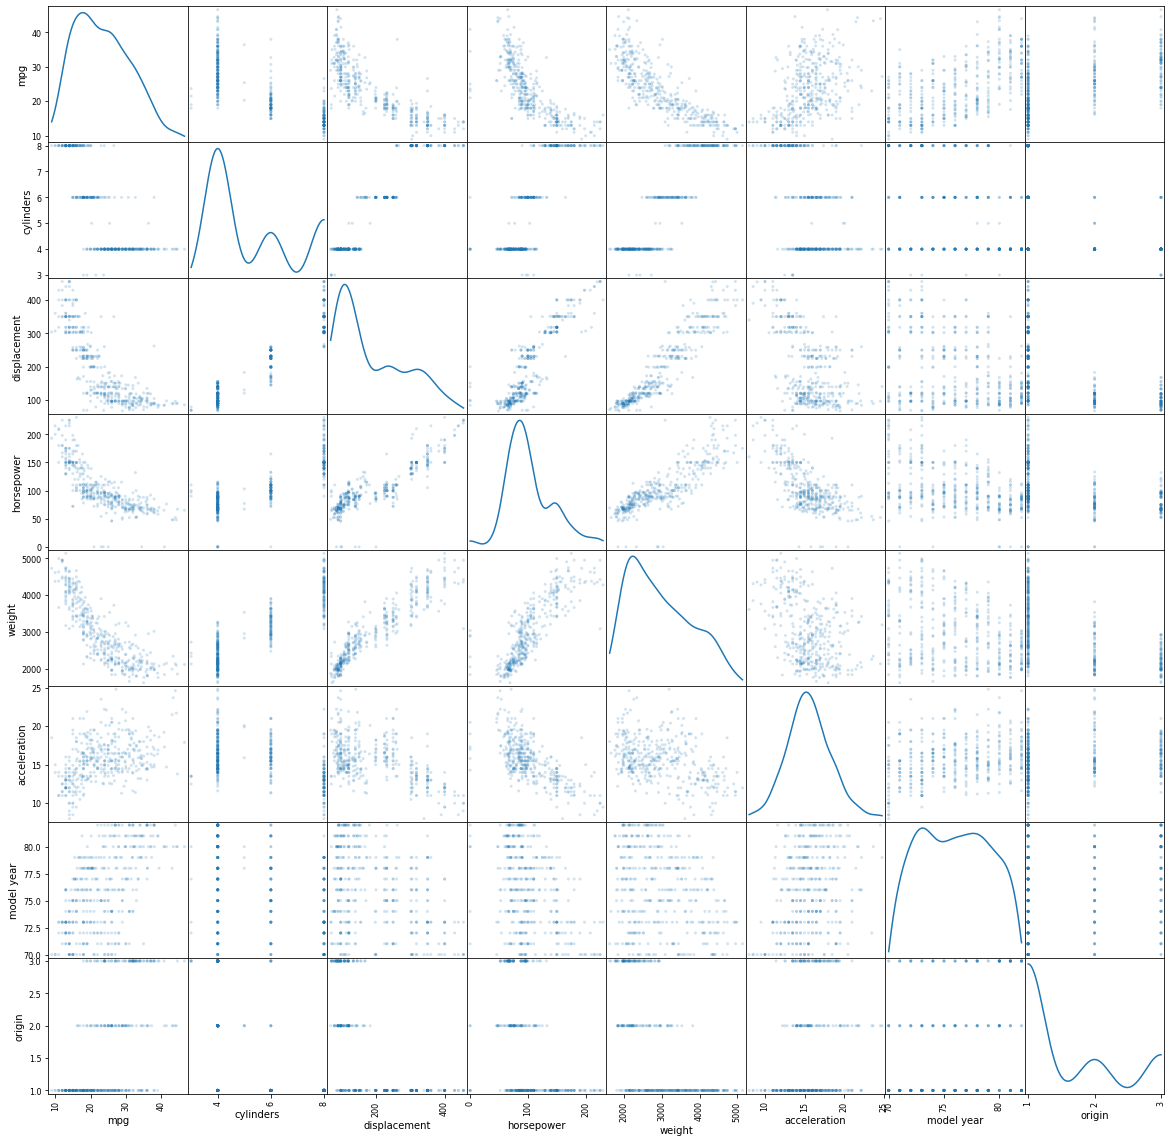

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_autos, alpha=0.2, figsize=(20, 20), diagonal="kde");

In [ ]:
from sklearn.model_selection import train_test_split

X = df_autos.drop(["mpg"], axis = 1)
y = df_autos.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
X.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

278    31.5
0      18.0
146    28.0
264    18.1
290    15.5
379    36.0
20     25.0
27     11.0
137    13.0
294    34.1
126    21.0
238    33.5
160    17.0
293    31.9
298    23.0
233    29.0
229    16.0
389    22.0
173    24.0
152    19.0
256    20.5
295    35.7
100    18.0
253    20.5
369    34.0
112    19.0
390    32.0
53     31.0
223    15.5
302    34.5
37     18.0
291    19.2
21     24.0
188    16.0
387    38.0
177    23.0
254    20.2
90     12.0
317    34.3
166    13.0
221    17.5
258    20.6
49     23.0
54     35.0
151    31.0
182    28.0
212    16.5
282    22.3
289    16.9
334    23.7
208    13.0
190    14.5
10     15.0
333    32.7
28      9.0
359    28.1
39     14.0
366    17.6
240    30.5
11     14.0
172    25.0
265    17.5
266    30.0
147    24.0
222    17.0
284    20.6
315    24.3
52     30.0
195    29.0
338    27.2
103    11.0
225    17.5
361    25.4
40     14.0
47     19.0
59     23.0
16     18.0
311    32.1
237    30.5
307    26.8
314    26.4
194    22.5
189    15.5
86  

In [ ]:
from sklearn.linear_model import LinearRegression
clf_lin = LinearRegression()
clf_lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = clf_lin.predict(X_test)
linear_score=clf_lin.score(X_test, y_test)
print("The accuracy  is: " ,linear_score)

The accuracy  is:  0.8538104162891726


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

9.593083830565751
2.450558979033968


#Conclusion
1. Thus I performed linear regression and logistic regression on a given problem statement.
2. Handled missing values by dropping columns and imputing attributes i.e. calculation of mean value of column.
3. Exploratory data analysis helped to understand the data and its attributes in detail
